# Foundations of Computational Economics #17

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Linear regression using Pandas and Numpy

<img src="_static/img/lab.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/LafDXp28IRE](https://youtu.be/LafDXp28IRE)

Description: Using Numpy and Pandas to estimate simple regression.

### Linear regression

Recall the classic linear regression model with data in columns of
$ (X,y) $, where $ X $ are independent variables and $ y $ is
the dependent variable.
Parameter vector to be estimated is $ \beta $, and we assume that
errors follow $ \varepsilon \sim N(0, \sigma) $

$$
y = X \beta + \varepsilon \quad \quad \varepsilon \sim N(0, \sigma)
$$

Let $ \hat{\beta} $ denote the estimate of the parameters $ \beta $.
To find it, we minimize the sum of squares of the residuals
$ e = y - X \hat{\beta} $, i.e. $ e'e \longrightarrow_{\hat{\beta}} \min $,
which leads to the well known OLS formula

$$
\hat{\beta} = (X'X)^{-1} X' y
$$

The mean standard error (MSE) of the regression is calculated as $ s = \sqrt{\frac{1}{n-k} e'e} $,
where $ n $ is the number of observations and $ k $ is the number of parameters (elements in $ \beta $).

The variance-covariance matrix of the estimates is given by $ \hat{\Sigma} = s^2 (X'X)^{-1} $.
The square root of the diagonal elements of this matrix are them standard deviations of the estimates, and give us the measure of the accuracy of the estimated parameters.

[William Greene “Econometric Analysis”](https://books.google.com.au/books?id=LWQuAAAAQBAJ&dq=greene%20econometric%20analysis)

In [47]:
import numpy as np
def ols(X,y,addConstant=True,verbose=True):
    '''Return the OLS estimates and their variance-covariance matrix for the given data X,y
    When addConstant is True, constant is added to X
    When verbose is True, a report is printed
    '''
    if X.ndim == 1:
        X = X[:,np.newaxis]
    if y.ndim == 1:
        y = y[:,np.newaxis]
    
    if addConstant:
        # add a column of one to X so that we can have the intercept
        X = np.hstack((np.ones((X.shape[0],1)),X))
    beta = np.linalg.inv(X.T@X) @ X.T@y
    e = y - X@beta
    n,k = X.shape
    s2 = e.T@e / (n - k)
    s = np.sqrt(s2)[0,0]
    sigma = np.linalg.inv(X.T@X) * s2
    beta_std = np.sqrt(np.diag(sigma))
    if verbose:
        print('Number of observations: {}'.format(n))
        print('Number of paramters: {}'.format(k))
        print('MSE={:.5f}'.format(s))
        for b,std in zip(beta, beta_std):
            b = b[0]
            print('{:10.5f} {{:10.5f}}'.format(b,std))
    return beta, sigma

In [48]:
# test on small dataset
X = np.array([[5, 3],
              [2, 3],
              [3, 1],
              [2, 8],
              [4.5, 2.5],
              [2.5, 1.5],
              [4.3, 4.2],
              [0.5, 3.5],
              [1, 5],
              [3, 8]])
truebeta = np.array([1.234,-0.345])[:,np.newaxis]  # column vector
y = X @ truebeta + 2.5 + np.random.normal(size=(X.shape[0],1),scale=0.2)

beta,S=ols(X,y)
beta,S=ols(X,y,addConstant=False)

Number of observations: 10
Number of paramters: 3
MSE=0.24619
   2.58477 {:10.5f}
   1.22233 {:10.5f}
  -0.34875 {:10.5f}
Number of observations: 10
Number of paramters: 2
MSE=0.96151
   1.68355 {:10.5f}
  -0.08858 {:10.5f}


In [49]:
# test with one dimensional arrays
X = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([9.4,8.1,7.7,6.3,5.7,4.4,3.0,2.1,1.1,0.8])

beta,S=ols(X,y)
beta,S=ols(X,y,addConstant=False)

Number of observations: 10
Number of paramters: 2
MSE=0.30881
  10.38000 {:10.5f}
  -1.00364 {:10.5f}
Number of observations: 10
Number of paramters: 1
MSE=5.07328
   0.47922 {:10.5f}


In [70]:
import numpy as np
def ols(X,y,addConstant=True,verbose=True):
    '''Return the OLS estimates and their variance-covariance matrix for the given data X,y
    When addConstant is True, constant is added to X
    When verbose is True, a report is printed
    '''
    y = y.squeeze()  # we are better off if y is one-dimensional
    if addConstant and X.ndim==1:
        X = np.hstack((np.ones(X.shape[0])[:,np.newaxis],X[:,np.newaxis]))
        k = 2
    elif addConstant and X.ndim>1:
        X = np.hstack((np.ones(X.shape[0])[:,np.newaxis],X))
        k = X.shape[1]+1
    elif X.ndim==1:
        X = X[:,np.newaxis]
    xxinv = np.linalg.inv(X.T@X)  # inv(X'X)
    beta = xxinv @ X.T@y  # OLS estimates
    e = y - X@beta  # residuals
    n,k = X.shape  # number of observations and parameters
    s2 = e.T@e / (n-k)
    Sigma = s2*xxinv
    if verbose:
        # report the estimates
        print('Number of observations: {:d}\nNumber of parameters: {:d}'.format(n,k))
        print('Parameter estimates (std in brackets)')
        for b,s in zip(beta,np.sqrt(np.diag(Sigma))):
            print('{:10.5f} ({:10.5f})'.format(b,s))
        print('MSE = {:1.5f}\n'.format(np.sqrt(s2)))
    return beta,Sigma

### Data on median wages

**The Economic Guide To Picking A College Major**

Data dictionary available at

[https://github.com/fivethirtyeight/data/tree/master/college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [77]:
import pandas as pd
# same data as in video 15
data = pd.read_csv('./_static/data/recent-grads.csv')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [79]:
data[['ShareWomen']].head(n=50)

,ShareWomen
0,0.120564
1,0.101852
2,0.153037
3,0.107313
4,0.341631
5,0.144967
6,0.441356
7,0.535714
8,0.119559
9,0.196450


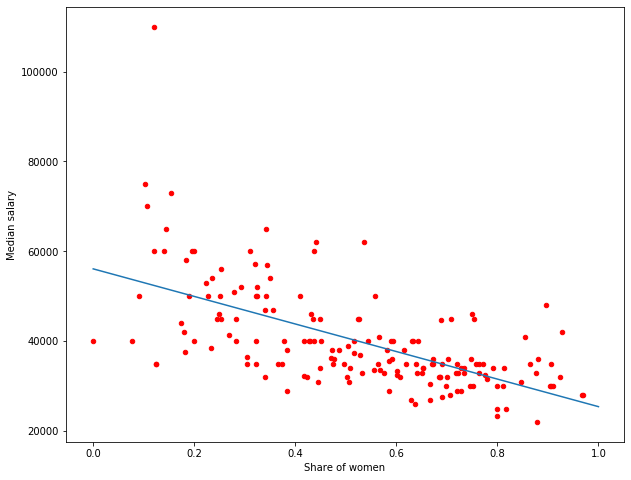

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
data1 = data[['Median','ShareWomen']].dropna()
data1.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')
# add a linear regression line to the plot

beta,_ = ols(X = data1['ShareWomen'], y = data1['Median'],verbose = False)
xx = np.linspace(0,1,100)
ln = lambda x: beta[0] + beta[1]*x
plt.plot(xx,ln(xx))
#print(data1[['Median','ShareWomen']].isnull().sum()) # Show the amount of nulls in WomenShare and Mediuan Nan in data


Median        0
ShareWomen    1
dtype: int64


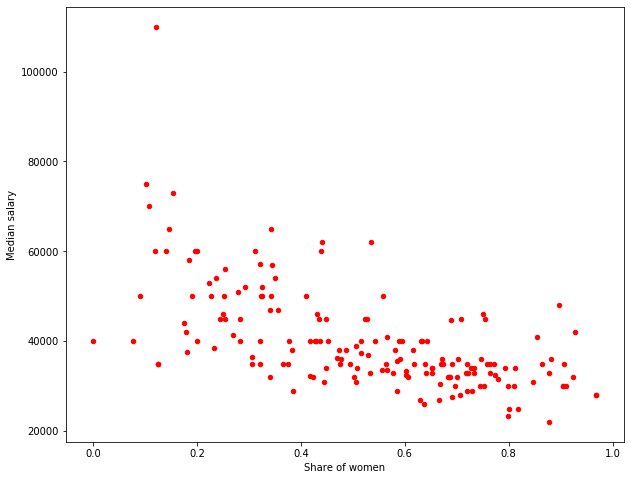

In [81]:
print(data[['Median','ShareWomen']].isnull().sum()) # check if there are NaNs in the data!
data1 = data[['Median','ShareWomen']].dropna()  # drop NaNs
data1.plot(x='ShareWomen', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Share of women')
plt.ylabel('Median salary')
# add a linear regression line to the plot
b,_ = ols(X=data['ShareWomen'],y=data['Median'],verbose=False)
fn = lambda x: b[0]+b[1]*x
xx = np.linspace(0,1,100)
plt.plot(xx,fn(xx),color='navy',linewidth=3)
plt.show()

In [82]:
# create fraction variables
data.drop(index=data[data['Total']==0].index,inplace=True)  # drop zero Totals
data.drop(index=data[data['Employed']==0].index,inplace=True)  # drop zero Employed
data['Employment rate'] = data['Employed'] / data['Total']
data['Fulltime rate'] = data['Full_time'] / data['Employed']
data2 = data[['Median','ShareWomen','Employment rate','Fulltime rate']].dropna()  # drop NaNs
y = data2['Median']/1000  # rescale salary

In [83]:
# run the full model
ols(data2[['ShareWomen','Employment rate','Fulltime rate']],y);

Number of observations: 171
Number of parameters: 4
Parameter estimates (std in brackets)
  47.78925 (  10.54264)
 -27.86576 (   3.38424)
 -10.81362 (   9.80911)
  18.51797 (   7.52103)
MSE = 8.83857



#### Further learning resources

- Regression analysis using `sklearn` library
  [https://datascience.quantecon.org/applications/regression.html](https://datascience.quantecon.org/applications/regression.html)  